# Final Project of Introduction to Bioinformatics

## Find The Imposter - Deciphering Mysterious Sequences

#### TA: Javad Razi (j.razi@outlook.com)

## Project Description: The Genomic Detective - Delving into Avian DNA with Galaxy

### Overview

Welcome to an exploratory journey into the world of bioinformatics, where we will delve into the DNA of flying species. This project presents a unique opportunity to unravel a genomic mystery using Galaxy, a sophisticated yet user-friendly bioinformatics platform. Your mission is to assemble a genome from short-read sequences, revealing insights into a specific DNA sequence found in various avian species. Along the way, you'll learn to navigate the complexities of genome assembly and conduct detailed BLAST searches, piecing together a puzzle millions of years in the making.

### Objectives and Workflow

1. **Introduction and Setup with Galaxy:**
   - Start by exploring the Galaxy platform, designed for bioinformatics analysis. You can find a comprehensive introduction and a step-by-step guide on how to use Galaxy, including how to set up your work environment and get data into Galaxy, at the [Galaxy Project Training Network](https://training.galaxyproject.org/). This resource provides a hands-on introduction to Genomics and Galaxy, covering basic aspects like creating a new history and using the Get Data toolbox.

2. **Genome Assembly:**
   - For learning about genome assembly methods, the [Galaxy Project Training Network](https://training.galaxyproject.org/) offers a variety of resources and guides. This site provides access to a wide range of learning materials, helping users to understand the intricacies of genome assembly within the Galaxy platform.

3. **Performing BLAST Searches:**
   - To understand how to perform BLAST searches using Galaxy, the NCBI BLAST User Guide remains a crucial resource. You can access it at [NCBI's BLAST User Guide](https://www.ncbi.nlm.nih.gov/books/NBK279690/). This guide offers detailed instructions and insights into using BLAST for sequence comparison and analysis.

4. **Comparative Genomics and Analysis:**
   - Compare your findings against existing genomic data. This comparative analysis will help you shed light on the unique aspects of your assembled sequence and its significance in avian genetics.

### Specific Deliverables

- **Complete Code:** Submit all the code you used for assembling the genome, performing BLAST searches, and further analysis. Ensure your code is well-commented and organized for clarity.
- **Assembled Genome Fasta File:** Provide the fasta file of the assembled genome. This should be the direct output of your assembly process.
- **BLAST Results CSV File:** Include a CSV file with the results from your BLAST searches. This file should contain detailed information about any genomic matches found.
- **Detailed Interpretation:** At the end of your notebook, include a thorough interpretation of your findings. Discuss the significance of the sequence within the avian genome, any similarities or differences with sequences in other species, and the potential implications of these results. Your interpretation should be grounded in the data analysis conducted.

In [ ]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'bioblend',
    'biopython',
    'pandas'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

bioblend (1.2.0) is installed
biopython (1.83) is installed
pandas (1.5.3) is installed


## Part 1: Assembling Using Galaxy

#### Option 1: Python Notebook

Finish this section of notebook to assemble a genome from a fasta file with short-read sequences.

#### Option 2: Galaxy Web Interface

Alternatively, you can use the Galaxy web interface at usegalaxy.org to complete the assembly. This approach allows you to experience the ease and efficiency of Galaxy's web-based tools.


In [ ]:
!pip3 install python-dotenv

In [ ]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv(dotenv_path='../../.env')

# You can create your API key by registering at usegalaxy website, and from user settings section.
# It is recommended that you store this key as an environment variable, and not expose it!
api_key = "a52a7712bfc212b60514205bfc79191e"

In [ ]:
import bioblend.galaxy

# Initialize Galaxy instance
gi = bioblend.galaxy.GalaxyInstance(url='https://usegalaxy.org/', key=api_key)

In [ ]:
# Upload the fasta file to Galaxy
fasta_path = '/content/short_reads.fasta'
fasta_hist = gi.histories.create_history(name="FindTheImposterTask_Fasta")
fasta_dict = gi.tools.upload_file(fasta_path, fasta_hist['id'], type='fasta')

fasta_dict

{'outputs': [{'id': 'f9cad7b01a4721354b64d62a5c653bf5',
   'hda_ldda': 'hda',
   'uuid': '1d9c5fd7-1b0e-4855-be05-13fd107b1c58',
   'hid': 1,
   'file_ext': 'auto',
   'peek': None,
   'model_class': 'HistoryDatasetAssociation',
   'name': 'short_reads.fasta',
   'deleted': False,
   'purged': False,
   'visible': True,
   'state': 'queued',
   'history_content_type': 'dataset',
   'file_size': 0,
   'create_time': '2024-02-08T08:56:49.946242',
   'update_time': '2024-02-08T08:56:49.967705',
   'data_type': 'galaxy.datatypes.data.Data',
   'genome_build': '?',
   'validated_state': 'unknown',
   'validated_state_message': None,
   'misc_info': None,
   'misc_blurb': None,
   'tags': [],
   'history_id': '3f7b08b94f7d23d2',
   'metadata_dbkey': '?',
   'output_name': 'output0'}],
 'output_collections': [],
 'jobs': [{'model_class': 'Job',
   'id': 'bbd44e69cb8906b59f813b264ca9ff4a',
   'state': 'new',
   'exit_code': None,
   'update_time': '2024-02-08T08:56:49.994703',
   'create_time'

In [ ]:
assembly_tool_name = 'SPAdes'
# assembly_tool = gi.tools.get_tools(name='velveth')[0]
assembly_tool = gi.tools.get_tools(name='SPAdes')[0]

In [ ]:
# Identify and Prepare the Assembly Tool

# Retrieve SPAdes assembly tool from Galaxy's tool repository.
# assembly_tool_name = 'SPAdes'
# assembly_tool = gi.tools.get_tools(name=assembly_tool_name)[0]
assembly_tool = gi.tools.get_tools(name='SPAdes')[0]

# Prepare inputs for the SPAdes assembly tool
assembly_params = {
    # Set the mode for the assembly. SPAdes has different modes like 'careful', 'normal', etc.
    # Refer to SPAdes documentation to understand what modes are available and what each mode does.
    'mode_sel': '--careful',

    # Specify the operation mode. SPAdes allows different operations like error correction, only assembly, etc.
    # Select the one that aligns with your project requirements.
    'operation_mode': '--only-assembler',
}

# Run the SPAdes Assembly Tool
try:
    assembly_dict = gi.tools.run_tool(fasta_hist['id'], assembly_tool['id'], assembly_params)
except ConnectionError as e:
    print(f"Failed to run the assembly tool: {e}")
    raise

# Wait for the assembly job to complete
assembly_dict = gi.jobs.wait_for_job(job_id=assembly_dict['jobs'][0]['id'], maxwait=120, interval=5, check=True)

In [ ]:
assembly_dict

{'model_class': 'Job',
 'id': 'bbd44e69cb8906b525ae872089d59a31',
 'state': 'ok',
 'exit_code': 0,
 'update_time': '2024-02-08T06:29:18.732227',
 'create_time': '2024-02-08T06:28:49.484887',
 'galaxy_version': '23.2',
 'command_version': '3.15.3',
 'copied_from_job_id': None,
 'tool_id': 'toolshed.g2.bx.psu.edu/repos/nml/spades/spades/3.15.3+galaxy2',
 'history_id': 'cab607f93f86252a',
 'params': {'operation_mode': '"--only-assembler"',
  'singlePaired': '{"__current_case__": 0, "input1": {"values": [{"id": 122612828, "src": "hda"}]}, "sPaired": "single"}',
  'additional_reads': '{"__current_case__": 1, "selector": "false"}',
  'arf': '{"nanopore": null, "pacbio": null, "sanger": null, "trusted_contigs": null, "untrusted_contigs": null}',
  'mode_sel': '"--careful"',
  'cov_cond': '{"__current_case__": 0, "cov_cutoff": "off"}',
  'kmer_cond': '{"__current_case__": 0, "kmer_sel": "auto"}',
  'phred_offset': '"auto"',
  'optional_output': '["ag", "ags", "cn", "sc"]',
  'chromInfo': '"/cv

In [ ]:
assembly_dict['outputs']

{'out_ag': {'id': 'f9cad7b01a4721356405cc26e848180f',
  'src': 'hda',
  'uuid': 'c9d01a9f-2edf-4c3f-8183-f433368fa813'},
 'out_ags': {'id': 'f9cad7b01a47213534cbb19c9ed5f224',
  'src': 'hda',
  'uuid': 'f83f68cc-63b5-4890-811f-d819da9d435f'},
 'out_cn': {'id': 'f9cad7b01a47213529d2f1ff1738b5fd',
  'src': 'hda',
  'uuid': '869bc93c-8d07-4607-8023-a9f62ee60e60'},
 'out_sc': {'id': 'f9cad7b01a47213506cc51f7f373f7c3',
  'src': 'hda',
  'uuid': '97bf495d-1b86-4838-8546-41431e4033c2'}}

In [ ]:
# from pprint import pprint
# pprint(gi.histories.get_histories())

[{'annotation': None,
  'archived': False,
  'count': 5,
  'deleted': False,
  'id': 'e83e7e6737eec45f',
  'model_class': 'History',
  'name': 'FindTheImposterTask_Fasta',
  'preferred_object_store_id': None,
  'published': False,
  'purged': False,
  'tags': [],
  'update_time': '2024-02-04T01:29:37.771983',
  'url': '/api/histories/e83e7e6737eec45f'},
 {'annotation': None,
  'archived': False,
  'count': 0,
  'deleted': False,
  'id': '3af78ae6a694dde3',
  'model_class': 'History',
  'name': 'FindTheImposterTask_Fasta',
  'preferred_object_store_id': None,
  'published': False,
  'purged': False,
  'tags': [],
  'update_time': '2024-02-04T01:26:51.897002',
  'url': '/api/histories/3af78ae6a694dde3'},
 {'annotation': None,
  'archived': False,
  'count': 5,
  'deleted': False,
  'id': 'f4eb21bd1a964290',
  'model_class': 'History',
  'name': 'FindTheImposterTask_Fasta',
  'preferred_object_store_id': None,
  'published': False,
  'purged': False,
  'tags': [],
  'update_time': '2024-0

In [ ]:
# pprint(gi.histories.get_histories(name='FindTheImposterTask_Fasta'))
# hist_id = gi.histories.get_histories(name='FindTheImposterTask_Fasta')[0]['id']
# hist_id

[{'annotation': None,
  'archived': False,
  'count': 5,
  'deleted': False,
  'id': 'e83e7e6737eec45f',
  'model_class': 'History',
  'name': 'FindTheImposterTask_Fasta',
  'preferred_object_store_id': None,
  'published': False,
  'purged': False,
  'tags': [],
  'update_time': '2024-02-04T01:29:37.771983',
  'url': '/api/histories/e83e7e6737eec45f'},
 {'annotation': None,
  'archived': False,
  'count': 0,
  'deleted': False,
  'id': '3af78ae6a694dde3',
  'model_class': 'History',
  'name': 'FindTheImposterTask_Fasta',
  'preferred_object_store_id': None,
  'published': False,
  'purged': False,
  'tags': [],
  'update_time': '2024-02-04T01:26:51.897002',
  'url': '/api/histories/3af78ae6a694dde3'},
 {'annotation': None,
  'archived': False,
  'count': 5,
  'deleted': False,
  'id': 'f4eb21bd1a964290',
  'model_class': 'History',
  'name': 'FindTheImposterTask_Fasta',
  'preferred_object_store_id': None,
  'published': False,
  'purged': False,
  'tags': [],
  'update_time': '2024-0

'e83e7e6737eec45f'

In [ ]:
# pprint(gi.datasets.show_dataset(hist_id))

{'accessible': True,
 'annotation': None,
 'api_type': 'file',
 'copied_from_ldda_id': None,
 'create_time': '2012-06-22T22:48:25.333585',
 'created_from_basename': None,
 'creating_job': '80af44b3e2f0d8fb',
 'data_type': 'galaxy.datatypes.interval.Interval',
 'dataset_id': '9ab84ccea7060015',
 'deleted': False,
 'display_apps': [{'label': 'display at Ensembl',
                   'links': [{'href': '/display_application/ae648a5b5e1b8780/ensembl_interval/ensembl_May_2009',
                              'target': '_blank',
                              'text': 'May 2009'}]},
                  {'label': 'display at RViewer',
                   'links': [{'href': '/display_application/ae648a5b5e1b8780/rviewer_interval/lbl_main',
                              'target': '_blank',
                              'text': 'main'}]},
                  {'label': 'display with IGV',
                   'links': [{'href': '/display_application/ae648a5b5e1b8780/igv_interval_as_bed/local_default',
     

In [ ]:
for output_name, output_info in assembly_dict['outputs'].items():
        dataset_id = output_info['id']
        gi.datasets.download_dataset(dataset_id, file_path = './')
        print(dataset_id)

f9cad7b01a4721356405cc26e848180f
f9cad7b01a47213534cbb19c9ed5f224
f9cad7b01a47213529d2f1ff1738b5fd
f9cad7b01a47213506cc51f7f373f7c3


In [ ]:
# gi.datasets.download_dataset('f9cad7b01a47213578e1e514d10a9f64', file_path='.')

'./Galaxy12-[SPAdes_on_data_1__Scaffolds].fasta'

In [ ]:
# # Check if the assembly job completed successfully
# if assembly_dict['state'] == 'ok':
#     # Retrieve the output dataset (assembled genome) ID from the job info
#     output_dataset_id = assembly_dict['outputs']['out_ag']['id']
#     output_dataset_id2 = assembly_dict['outputs']['out_ags']['id']
#     output_dataset_id3 = assembly_dict['outputs']['out_cn']['id']
#     output_dataset_id4 = assembly_dict['outputs']['out_sc']['id']

#     # Specify the destination path on your local machine to save the downloaded FASTA file
#     local_destination_path = '/path/on/your/local/machine/assembly_result.fasta'
#     download_path = 'https://usegalaxy.org/api/datasets/f9cad7b01a4721351fcb1f6e1d6576f1/display?to_ext=fasta'

#     # Download the assembled genome (output dataset) as a FASTA file
#     try:
#         gi.datasets.download_dataset(output_dataset_id, file_path=download_path, use_default_filename=False)
#         print(f"Assembly result downloaded successfully to {local_destination_path}")
#     except ConnectionError as e:
#         print(f"Failed to download the assembly result: {e}")
# else:
#     print("Assembly job did not complete successfully. Check the job status for details.")


FileNotFoundError: [Errno 2] No such file or directory: 'https://usegalaxy.org/api/datasets/f9cad7b01a4721351fcb1f6e1d6576f1/display?to_ext=fasta'

In [ ]:
# # Identify and Prepare the Assembly Tool

# # Retrieve a genome assembly tool from Galaxy's tool repository.
# # Replace 'YourToolNameHere' with the name of the assembly tool you choose.
# # Tip: Look for a tool suitable for assembling short-read sequences.

# ### TODO ###
# assembly_tool = gi.tools.get_tools(name='velveth')[0]
# ### TODO ###

# # Prepare inputs for the assembly tool
# # The parameters you set here will depend on the tool and its specific requirements
# assembly_params = {
#     # Set the mode for the assembly. Each tool might have different modes like 'careful', etc. You can analyze the web application
#     # of the galaxy to explore the options you have.
#     # Tip: Refer to the selected tool’s documentation to understand what modes are available and what each mode does.
#     'mode_sel': 'careful',

#     # Specify the operation mode. Some tools allow different operations like error correction, only assembly, etc.
#     # Tip: If your tool offers different operation modes, select the one that aligns with your project requirements.
#     'operation_mode': 'assembly',
# }

# # Run the Assembly Tool
# try:
#     assembly_dict = gi.tools.run_tool(fasta_hist['id'], assembly_tool['id'], assembly_params)
# except ConnectionError as e:
#     print(f"Failed to run the assembly tool: {e}")
#     raise

# # Wait for the assembly job to complete
# assembly_dict = gi.jobs.wait_for_job(job_id=assembly_dict['jobs'][0]['id'], maxwait=120, interval=5, check=True)


In [ ]:
# assembly_dict

{'model_class': 'Job',
 'id': 'bbd44e69cb8906b5986fe3f22d325deb',
 'state': 'ok',
 'exit_code': 0,
 'update_time': '2024-01-29T12:12:22.376935',
 'create_time': '2024-01-29T12:12:13.302653',
 'galaxy_version': '23.2',
 'command_version': '1.2.10',
 'copied_from_job_id': None,
 'tool_id': 'toolshed.g2.bx.psu.edu/repos/devteam/velvet/velveth/1.2.10.1',
 'history_id': 'fda196504ee24675',
 'params': {'hash_length': '"21"',
  'strand_specific': 'false',
  'inputs': '[]',
  'chromInfo': '"/cvmfs/data.galaxyproject.org/managed/len/ucsc/?.len"',
  'dbkey': '"?"',
  '__input_ext': '"data"'},
 'inputs': {},
 'outputs': {'out_file1': {'id': 'f9cad7b01a47213528ddf09cd9146cce',
   'src': 'hda',
   'uuid': '515f7e4a-7a56-4454-b481-1099266e2efe'}},
 'output_collections': {},
 'command_line': "mkdir -p '/corral4/main/jobs/055/206/55206403/outputs/dataset_515f7e4a-7a56-4454-b481-1099266e2efe_files' && velveth '/corral4/main/jobs/055/206/55206403/outputs/dataset_515f7e4a-7a56-4454-b481-1099266e2efe_file

In [ ]:
# Download the assembled genome from Galaxy. You can use the `download_dataset` method. A FASTA file, containing assembly
# of the whole sequence is what we expect here.

In [ ]:
# for key, value in assembly_dict.items():
#   print(key)
#   print(value)
#   print("*************")

model_class
Job
*************
id
bbd44e69cb8906b5986fe3f22d325deb
*************
state
ok
*************
exit_code
0
*************
update_time
2024-01-29T12:12:22.376935
*************
create_time
2024-01-29T12:12:13.302653
*************
galaxy_version
23.2
*************
command_version
1.2.10
*************
copied_from_job_id
None
*************
tool_id
toolshed.g2.bx.psu.edu/repos/devteam/velvet/velveth/1.2.10.1
*************
history_id
fda196504ee24675
*************
params
{'hash_length': '"21"', 'strand_specific': 'false', 'inputs': '[]', 'chromInfo': '"/cvmfs/data.galaxyproject.org/managed/len/ucsc/?.len"', 'dbkey': '"?"', '__input_ext': '"data"'}
*************
inputs
{}
*************
outputs
{'out_file1': {'id': 'f9cad7b01a47213528ddf09cd9146cce', 'src': 'hda', 'uuid': '515f7e4a-7a56-4454-b481-1099266e2efe'}}
*************
output_collections
{}
*************
command_line
mkdir -p '/corral4/main/jobs/055/206/55206403/outputs/dataset_515f7e4a-7a56-4454-b481-1099266e2efe_files' && velvet

In [ ]:
# assembly_dict['outputs']['out_file1']['id']

'f9cad7b01a47213528ddf09cd9146cce'

In [ ]:
# # Download the assembled genome from Galaxy. You can use the `download_dataset` method.
# # A FASTA file, containing the assembly of the whole sequence is what we expect here.

# # Retrieve the output dataset ID from the assembly job
# output_dataset_id = assembly_dict['outputs']['out_file1']['id']

# # Define the output file format (e.g., 'fasta')
# output_format = 'fasta'

# # Specify the local path where you want to save the downloaded file
# local_output_path = 'path/to/local/output/file.fasta'

# # Download the assembled genome
# try:
#     gi.datasets.download_dataset(output_dataset_id, file_path=local_output_path, use_default_filename=False, wait_for_completion=True)
#     print(f"Downloaded assembled genome to: {local_output_path}")
# except ConnectionError as e:
#     print(f"Failed to download the assembled genome: {e}")
#     raise


TypeError: DatasetClient.download_dataset() got an unexpected keyword argument 'wait_for_completion'

### Part 2: Using BLAST to Query The Assembled Sequence

In this part of the notebook, you will utilize the NCBI BLAST API to analyze the genome sequence you've assembled. This involves integrating the API into your notebook, submitting your sequence for BLAST querying, and then meticulously examining the results. Your focus will be on identifying similarities or unique traits in the sequence compared to others in the NCBI database, particularly exploring its relationship with known sequences in various species. This step is crucial for understanding the evolutionary and biological significance of your assembled genome.

**Note**: Unlike the previous section, for this one, you must deliver the full code in the notebook. Doing this part using website will not be graded.

In [ ]:
# Import necessary libraries
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from collections import defaultdict

In [ ]:
# Load the assembled genome
with open('/content/Galaxy5-[SPAdes_on_data_1__Scaffolds].fasta', 'r') as file:
    assembled_genome = ''.join(file.readlines()[1:])
assembled_genome

'GATAGTCGGGTTGGAAACTTACTATCCTTTCTTCTTGGTGTTTAAATAAATCTCCCAAAG\nGTATCTCTTCAGCTTCCTCGTGCTGAATAAGATAACCCGGTGGAACAGGAGTAGTAGTGG\nGAGGTATAACAGCTCTTAATGATTCGGCTATTTCATGCATGCCCTGTGTAGTCTGCCAGA\nAGTCTTCAATGAGATCCACAAAGTGAGTTGCAATCAAAACATGTTTCTTTATTGAATCTG\nATTTCCAATAAGGCTCTAAAGCGTCTTTAGCATCTCTAACAAGATCATCTATTTTTGGAA\nAGAAATCATCTGGTAGATCATACACATTGGCTAAGGCTCTAGAAGCATTGATATCCATAT\nATAAGCAAGAATCATAAACAATGGTACATACCAAAGGTACAGTCACACACGACAACAGCA\nATGTAGACGTAAAGATACCTTGGCAAGCAGCTCCGAAGGAGAGGGGTGTAATTCTTAAGT\nTCCACATAGCCTATGTGGAATATATATTGCTTTCGAGAGAGGGGTGTATGGAAAAGCCGT\nCCAATCAGGAGGTTTGTGCCTGGATGGGCCGTCAGCAGGATTATATTTGCTCGGGACAAA\nGTACAATTGTATCGGTTTGAGCAATTGTTTGGCCAACATAGCAAAATGCCATGGTAACGT\nCTGATAACGCTTATGGCAAACAAAAGTTGAATCAGATAAGAGACAACGTGGTTTAATCAT\nTATCTTGGCTAAACAAGACATCAATAGTTCCTGAACATGTATATCTCTGACCTTTGAAAA\nAGCAAACACTGCGCTCCCGCCGGTGATATGGGATATTGCGCCATGTGTTGGGGTAGCATC\nTGTAGCTACACGTGGCAAAGGTACAGAGGACTTTGGCTTTATTCTTAATTTACACACACC\nCATTGTTAGTTTATATAACAAAGTCCTATAGGATGAAGAGAAGCTAAAGTTTACTTGGTT\nAGTAATA

In [ ]:
from Bio.Blast import NCBIWWW

# Perform the BLAST query, filtering for eukaryotes
eukaryote_tax_id = "2759"

### TODO ###
result_handle = NCBIWWW.qblast(program='blastn',
                               database='nr',
                               sequence=assembled_genome,
                               entrez_query='txid2759[Organism]', # Only filter Eucaryotes. Hint: You can do this by giving their taxonomy id.
                               hitlist_size=100,
                               word_size=16)
### TODO ###

In [ ]:
from Bio.Blast import NCBIXML

blast_records = NCBIXML.parse(result_handle)

blast_records

<generator object parse at 0x78dec8f20970>

In [ ]:
!mkdir -p outputs

In [ ]:
import pandas as pd
from Bio import Entrez

# Set your email here for Entrez
Entrez.email = "morteza.shahrabii@gmail.com"

def fetch_taxonomy_info(accession):
    """
    Fetch taxonomy information using Entrez for a given accession number.
    """
    handle = Entrez.efetch(db="nucleotide", id=accession, retmode="xml")
    records = Entrez.read(handle)

    ### TODO ###

    taxonomy = records[0]["GBSeq_taxonomy"]
    species = records[0]["GBSeq_organism"]

    ### TODO ###

    return taxonomy, species


def parse_blast_results():
    """
    Parse BLAST results and extract relevant information including taxonomy.
    """
    blast_results = []

    for record in blast_records:
        for alignment in record.alignments:
            accession = alignment.accession
            taxonomy, species = fetch_taxonomy_info(accession)
            for hsp in alignment.hsps:
                # These fields are required in your submission
                blast_results.append({
                    'query_id': record.query_id,
                    'alignment_title': alignment.title,
                    'e_value': hsp.expect,
                    'identity': hsp.identities,
                    'accession': accession,
                    'taxonomy': taxonomy,
                    'species': species
                })
    return blast_results

blast_results = parse_blast_results()
df = pd.DataFrame(blast_results)
df.to_csv('./outputs/blast_results_with_taxonomy.csv', index=False)

df.head()

,query_id,alignment_title,e_value,identity,accession,taxonomy,species
0,Query_7802911,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,0.000000e+00,1168,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
1,Query_7802911,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,4.413000e-61,532,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
2,Query_7802911,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,0.000000e+00,1168,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
3,Query_7802911,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,1.876450e-59,531,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
4,Query_7802911,gi|389587607|gb|JQ978781.1| Melopsittacus undu...,0.000000e+00,1168,JQ978781,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus


## Analysis of The Results

### Drawing Your Own Conclusions

Now that you have completed the BLAST search, a fascinating part of your journey begins – interpreting the data. This stage is where your critical thinking and creativity come into play. From now on, the rest of the notebook will be about whatever you want it to be. Any path that leads to meaningful insights about the data and provides a solid conclusion for the task is acceptable. Let's explore some possible directions:

1. **Species-Specific Patterns:** Examine if the sequence is found exclusively or predominantly in certain species. What could this suggest about its evolution and adaptation? While the focus is not on finding a 'correct' answer, pondering this aspect can lead to interesting hypotheses about species-specific interactions.

2. **Functional Insights:** Reflect on the potential roles this sequence might play within the genomes where it's found. Could it be integral to certain biological functions, or a legacy of ancient genomic events?

3. **Comparative Genomics:** Compare your findings with sequences in other species. Notice any striking similarities or differences? These comparisons could shed light on the sequence's evolutionary journey.

4. **Ecological and Environmental Context:** Consider the ecological and environmental factors that might influence the distribution and evolution of this sequence. How might habitat or lifestyle of the species play a role in its presence or absence?

### Additional Tips and Encouragement

This project is more about the learning journey and less about achieving perfect results. Here are some additional pointers:

1. **Deep Dives:** Encourage yourself to explore the data thoroughly. Use various bioinformatics tools to gain a holistic understanding.

2. **Creative Visualization:** Craft visual representations of your analysis. Effective use of charts or infographics can provide insightful perspectives.

3. **Open-Ended Exploration:** Feel free to extend your analysis in directions you find intriguing. This could include phylogenetic studies or exploring the ecological aspects of the sequence.

Remember, this project is designed to be a learning experience. We don't expect you to uncover all the answers but rather to engage thoughtfully with the data and enjoy the process of discovery.

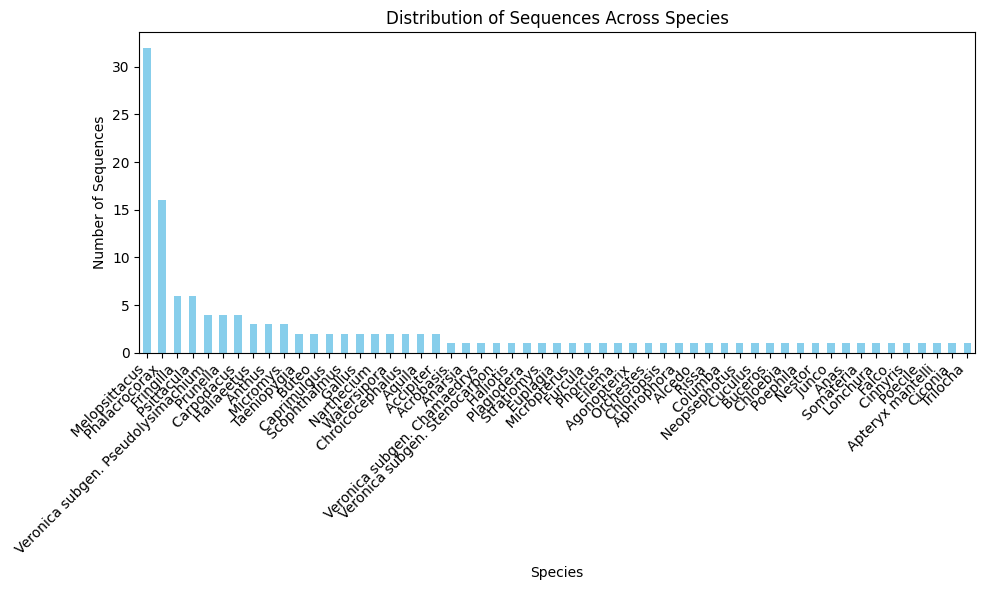

Basic Statistics:
Total number of sequences: 136
Species-wise distribution:
 Melopsittacus                         32
 Phalacrocorax                         16
 Fringilla                              6
 Psittacula                             6
 Veronica subgen. Pseudolysimachium     4
 Prunella                               4
 Carpodacus                             4
 Haliaeetus                             3
 Anthus                                 3
 Micromys                               3
 Taeniopygia                            2
 Buteo                                  2
 Caprimulgus                            2
 Scophthalmus                           2
 Gallus                                 2
 Narthecium                             2
 Watersipora                            2
 Chroicocephalus                        2
 Aquila                                 2
 Accipiter                              2
 Acrobasis                              1
 Anarsia                                1


In [ ]:
### TODO ###
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/content/outputs/blast_results_with_taxonomy.csv')

# Split the 'taxonomy' column into individual species
df['species'] = df['taxonomy'].str.split(';').str[-1]

# Count the occurrences of each species
species_counts = df['species'].value_counts()

# Calculate the total number of sequences
total_sequences = len(df)

# Calculate the proportion of sequences for each species
species_proportions = species_counts / total_sequences

# Plotting
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sequences Across Species')
plt.xlabel('Species')
plt.ylabel('Number of Sequences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display basic statistics
print("Basic Statistics:")
print(f"Total number of sequences: {total_sequences}")
print("Species-wise distribution:")
print(species_counts)
print("Proportion of sequences for each species:")
print(species_proportions)
